# *Base de dados sobre Email Phishing* 

Os dados foram obtidos pela plataforma [Kaggle](https://www.kaggle.com/datasets/ethancratchley/email-phishing-dataset).

Este conjunto de dados contém informações sobre emails para serem utilizados na detecção de possíveis phishings.

A partir dessas informações, é possível treinar um algoritmo para identificar se um email pode ser ou não um phishing.


Objetivo: **Classificação (predição) se um email é phishing ou não**



**Dicionário de dados:**

| Variável                | Descrição                                                             |
|------------------------|-------------------------------------------------------------------------|
| num_words              | Número total de palavras no corpo do e-mail                             |
| num_unique_words       | Contagem de palavras únicas utilizadas                                  |
| num_stopwords          | Contagem de palavras comuns (por exemplo, "o", "e", "em")               |
| num_links              | Número de links detectados                                              |
| num_unique_domains     | Número de domínios únicos nos links (por exemplo, "paypal.com")         |
| num_email_addresses    | Contagem de endereços de e-mail encontrados no texto                    |
| num_spelling_errors    | Contagem de palavras com erros ortográficos                             |
| num_urgent_keywords    | Número de palavras de urgência (por exemplo, "urgente", "verificar")    |
| label                  | Variável alvo: 0 = E-mail seguro, 1 = E-mail de phishing                 |



# Análise Exploratória e Pré-processamento

Através da análise exploratória, podemos entender e **estruturar** os dados da forma adequada. 

In [29]:
import pandas as pd

# Lendo o arquivo CSV principal
df = pd.read_csv("../dados/email_phishing_data.csv")

# Visualizando as primeiras linhas
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


Com base na descrição fornecida pelo autor, traduzimos os nomes das colunas para facilitar o entendimento.

In [30]:
# Dicionário de mapeamento (inglês para português simplificado)
mapeamento_colunas = {
    'num_words': 'Numero_Palavras',
    'num_unique_words': 'Numero_Palavras_Unicas',
    'num_stopwords': 'Numero_Palavras_Comuns',
    'num_links': 'Numero_Links',
    'num_unique_domains': 'Numero_Dominios_Unicos',
    'num_email_addresses': 'Numero_Emails',
    'num_spelling_errors': 'Numero_Palavras_Erro_Ortografico',
    'num_urgent_keywords': 'Numero_Palavras_Urgencia',
    'label': 'phishing'
}

# Renomear as colunas
df = df.rename(columns=mapeamento_colunas)

# Verificar o resultado
df.head()

,Numero_Palavras,Numero_Palavras_Unicas,Numero_Palavras_Comuns,Numero_Links,Numero_Dominios_Unicos,Numero_Emails,Numero_Palavras_Erro_Ortografico,Numero_Palavras_Urgencia,phishing
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


##### Segundo passo: Fazer algumas análises

Existe dados faltantes na minha base de dados?

In [31]:
dados_faltantes = df.isna().sum()

# Mostrar o resultado
print("Dados faltantes por coluna:")
print(dados_faltantes)

Dados faltantes por coluna:
Numero_Palavras                     0
Numero_Palavras_Unicas              0
Numero_Palavras_Comuns              0
Numero_Links                        0
Numero_Dominios_Unicos              0
Numero_Emails                       0
Numero_Palavras_Erro_Ortografico    0
Numero_Palavras_Urgencia            0
phishing                            0
dtype: int64


Precisamos checar como o dataframe está inicialmente estruturado:

In [32]:
#  Podemos verificar o tipo de dado de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   Numero_Palavras                   524846 non-null  int64
 1   Numero_Palavras_Unicas            524846 non-null  int64
 2   Numero_Palavras_Comuns            524846 non-null  int64
 3   Numero_Links                      524846 non-null  int64
 4   Numero_Dominios_Unicos            524846 non-null  int64
 5   Numero_Emails                     524846 non-null  int64
 6   Numero_Palavras_Erro_Ortografico  524846 non-null  int64
 7   Numero_Palavras_Urgencia          524846 non-null  int64
 8   phishing                          524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


Qual a quantidade de emails que são considerados phishing a empresa?

In [33]:
df['phishing'].value_counts()

# 0 são valores de emails seguros
# 1 são valores de emails phishing

phishing
0    517897
1      6949
Name: count, dtype: int64

Qual é a média de palavras de acordo com a classificação final do email?

In [34]:
media_palavras = df.groupby('phishing')['Numero_Palavras'].mean().round(2)

# Formatando a saída 
media_palavras.columns = ['Formação Acadêmica', 'Idade']
print(media_palavras)

phishing
0    276.63
1    246.15
Name: Numero_Palavras, dtype: float64


Para conferir rapidamente o nível de dispersão dos valores, podemos obter a mediana e confirmar se a média é "útil" neste caso:

In [35]:
df.groupby('phishing')['Numero_Palavras'].median()

phishing
0    120.0
1    110.0
Name: Numero_Palavras, dtype: float64

In [36]:
df.groupby('phishing')['Numero_Links'].mean().round(2)

phishing
0    0.90
1    0.42
Name: Numero_Links, dtype: float64

In [37]:
df.groupby('phishing')['Numero_Palavras_Erro_Ortografico'].mean().round(2)

phishing
0    24.77
1    19.16
Name: Numero_Palavras_Erro_Ortografico, dtype: float64

Podemos gerar visualizações para essas informações

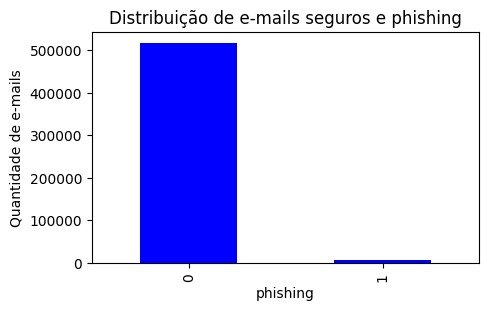

In [38]:
# Importar biblioteca de visualização de dados
import matplotlib.pyplot as plt

# Contar a quantidade de emails que são phishing
contagem_phishing = df['phishing'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(5, 3))
plt.xticks(ticks=[0, 1], labels=["Seguro", "Phishing"])
plt.ylabel("Quantidade de e-mails")
plt.title("Distribuição de e-mails seguros e phishing")
contagem_phishing.plot(kind='bar', color='blue')
plt.show()

**Transformação de dados** 

Se estivessemos com dados não númericos, precisariamos transformar esses dados para que o nosso futuro modelo de Machine Learning pudesse ser treinado e funcionar da maneira adequada. Tendo em vista que nossa base de dados possui apenas valores númericos, podemos pular essa etapa!

In [39]:
# Verificar se todas as variáveis são numéricas
df.dtypes

Numero_Palavras                     int64
Numero_Palavras_Unicas              int64
Numero_Palavras_Comuns              int64
Numero_Links                        int64
Numero_Dominios_Unicos              int64
Numero_Emails                       int64
Numero_Palavras_Erro_Ortografico    int64
Numero_Palavras_Urgencia            int64
phishing                            int64
dtype: object

Agora vamos salvar a nossa base de dados limpa:

In [40]:
#Salvar o DataFrame transformado em um arquivo CSV

caminho_arquivo = '../dados/dados_emails_transformados.csv'
df.to_csv(caminho_arquivo, index=False, encoding='utf-8-sig')

print(f"DataFrame salvo com sucesso em: {caminho_arquivo}")

DataFrame salvo com sucesso em: ../dados/dados_emails_transformados.csv
